In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd

## Read in 

In [63]:
df = pd.read_csv(os.environ['HOME']+'/SV/vi_merged.csv')
vi = Table.from_pandas(df)

In [13]:
truth = Table.read('/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/targets/truth.fits', hdu=1)

Join truth tables and master VI file

In [14]:
truth.rename_column('TARGETID', 'TargetID')

In [65]:
vi = join(vi, truth, join_type='left', keys='TargetID')

## Diagnostic plots

Text(0,0.5,'TRUEZ')

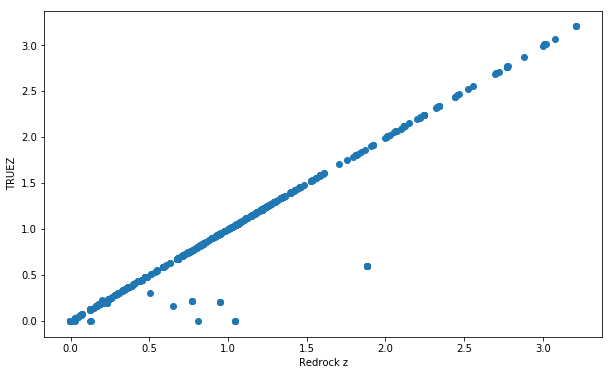

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(vi['Redrock z'], vi['TRUEZ'])
plt.xlabel('Redrock z')
plt.ylabel('TRUEZ')

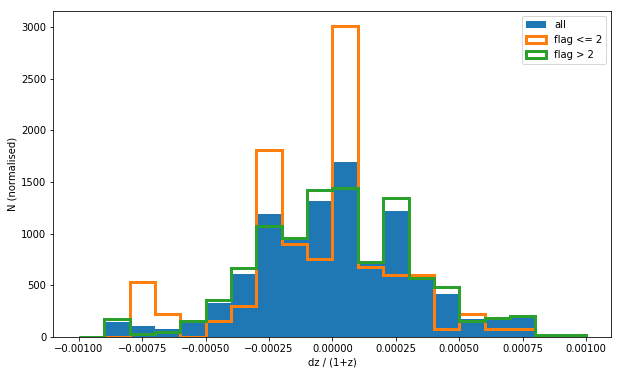

In [97]:
dz = (vi['Redrock z'] - vi['TRUEZ']) / (1 + vi['TRUEZ'])
plt.figure(figsize=(10,6))
x = plt.hist(dz, bins=20, range=(-1e-3, 1e-3), density=True, label='all')
plt.xlabel('dz / (1+z)')
plt.ylabel('N (normalised)')

x = plt.hist(dz[vi['VI class'] <=2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag <= 2', lw=3)
x = plt.hist(dz[vi['VI class'] > 2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag > 2', lw=3)
plt.legend()


In [157]:
bad_z = np.abs(dz) > 1e-2
print('number of bad redshifts: ', len(vi[bad_z]))

number of bad redshifts:  27


In [100]:
vi[bad_z]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230400893917232,2,0.126,0.00132108,STAR,STAR
288230400893917237,1,0.131,-0.000838826,STAR,STAR
288230420678448773,1,0.952,0.201905,QSO,QSO
288230420678448773,3,0.952,0.201905,QSO,QSO
288230420678448773,2,0.952,0.201905,QSO,QSO
288230420678449182,2,1.042,0.00041375,STAR,STAR
288230420678449182,4,1.042,0.00041375,STAR,STAR
288230420678449182,1,1.042,0.00041375,STAR,STAR
288230484385732548,3,1.881,0.595345,QSO,QSO


Text(0.5,0,'VI flag')

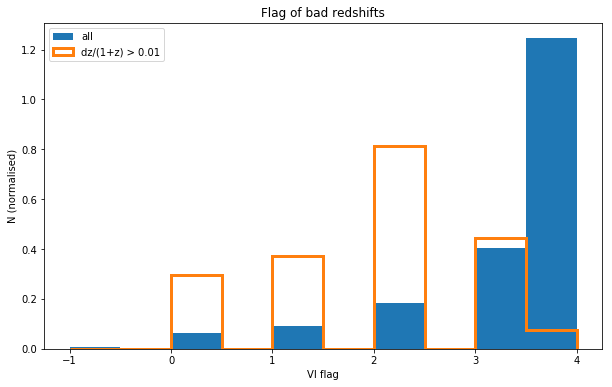

In [159]:
plt.figure(figsize=(10,6))
x = plt.hist(vi['VI class'], density=True, stacked=True, range=(-1,4), label='all')
x = plt.hist(vi[bad_z]['VI class'], density=True, stacked=True, range=(-1,4), \
             histtype='step', lw=3, label='dz/(1+z) > 0.01')
plt.legend()
plt.title('Flag of bad redshifts')
plt.ylabel('N (normalised)')
plt.xlabel('VI flag')

## Look at objects with poor flag but correct redshift

In [139]:
prob = (bad_z==False) & (vi['VI class'] <2) 
prob_ELG = (bad_z==False) & (vi['VI class'] <2) & (vi['TEMPLATETYPE'] == 'ELG       ')

In [141]:
vi[prob]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230403565684169,-1,1.249,1.24815,GALAXY,ELG
288230403565684424,1,1.23,1.22887,GALAXY,ELG
288230403565684424,1,1.23,1.22887,GALAXY,ELG
288230403565684638,1,1.449,1.44889,GALAXY,ELG
288230403565684862,-1,0.776,0.776305,GALAXY,ELG
288230403565684932,1,1.525,1.5253,GALAXY,ELG
288230403565685470,1,1.4,1.40041,GALAXY,ELG
288230403565685552,1,1.217,1.21763,GALAXY,ELG
288230403565685552,0,1.217,1.21763,GALAXY,ELG


Spot checks (spectra plots are screenshots)

In [149]:
this_ID = (vi['TargetID'] == 288230485253947791) #BGS
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230485253947791,0,0.325,0.324499,GALAXY,BGS
288230485253947791,2,0.325,0.324499,GALAXY,BGS
288230485253947791,0,0.325,0.324499,GALAXY,BGS


https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/bgs/pix26012/specviewer_BGS_ANY_pix26012_4.html -> spec 11

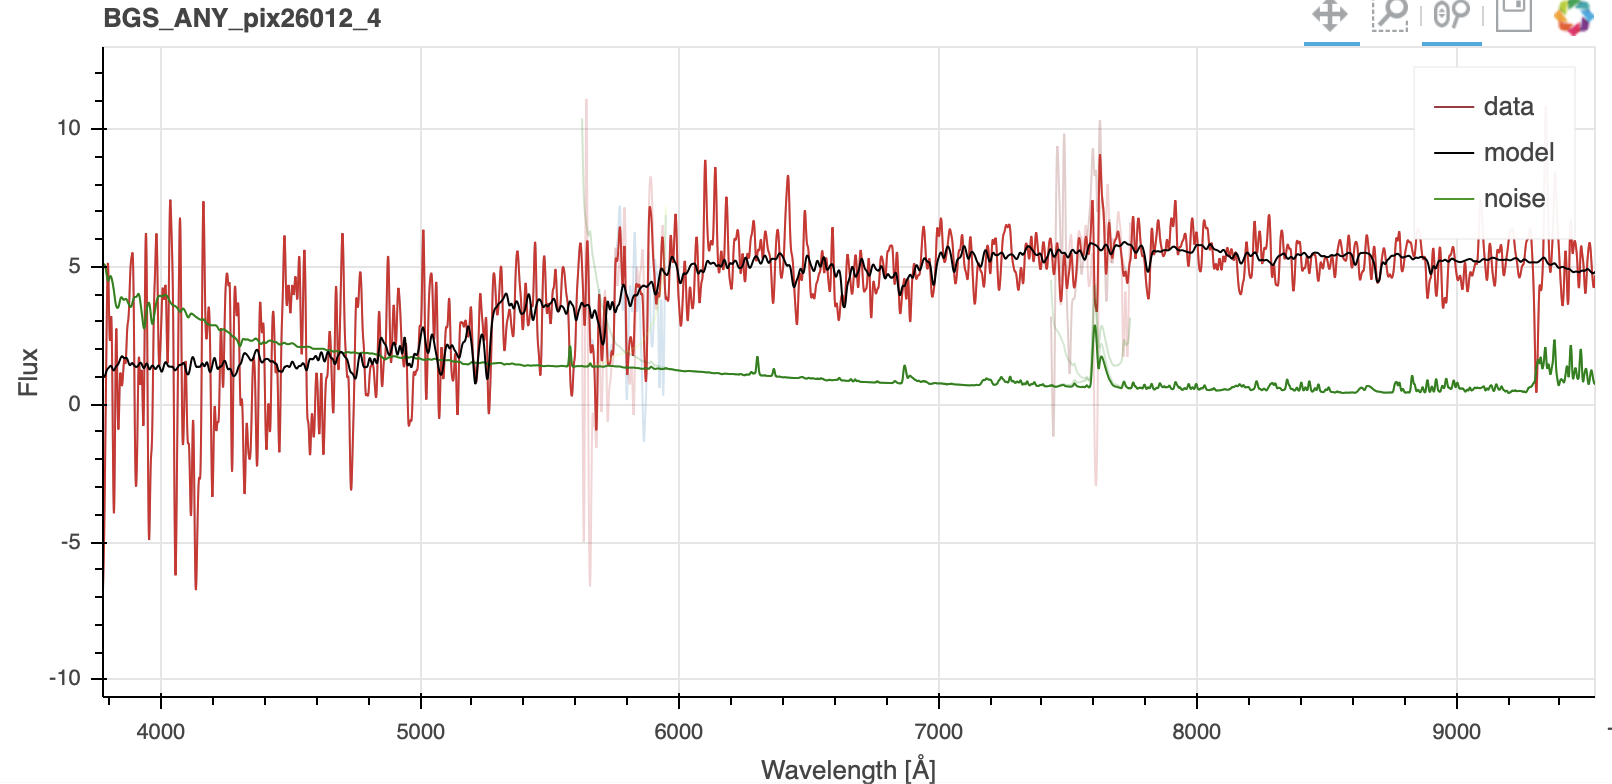

***

In [150]:
this_ID = (vi['TargetID'] == 288230403565684424) #ELG
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230403565684424,3,1.23,1.22887,GALAXY,ELG
288230403565684424,1,1.23,1.22887,GALAXY,ELG
288230403565684424,1,1.23,1.22887,GALAXY,ELG


https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/elg_bluesquare/pix6536/specviewer_ELG_pix6536_1.html -> spec 0

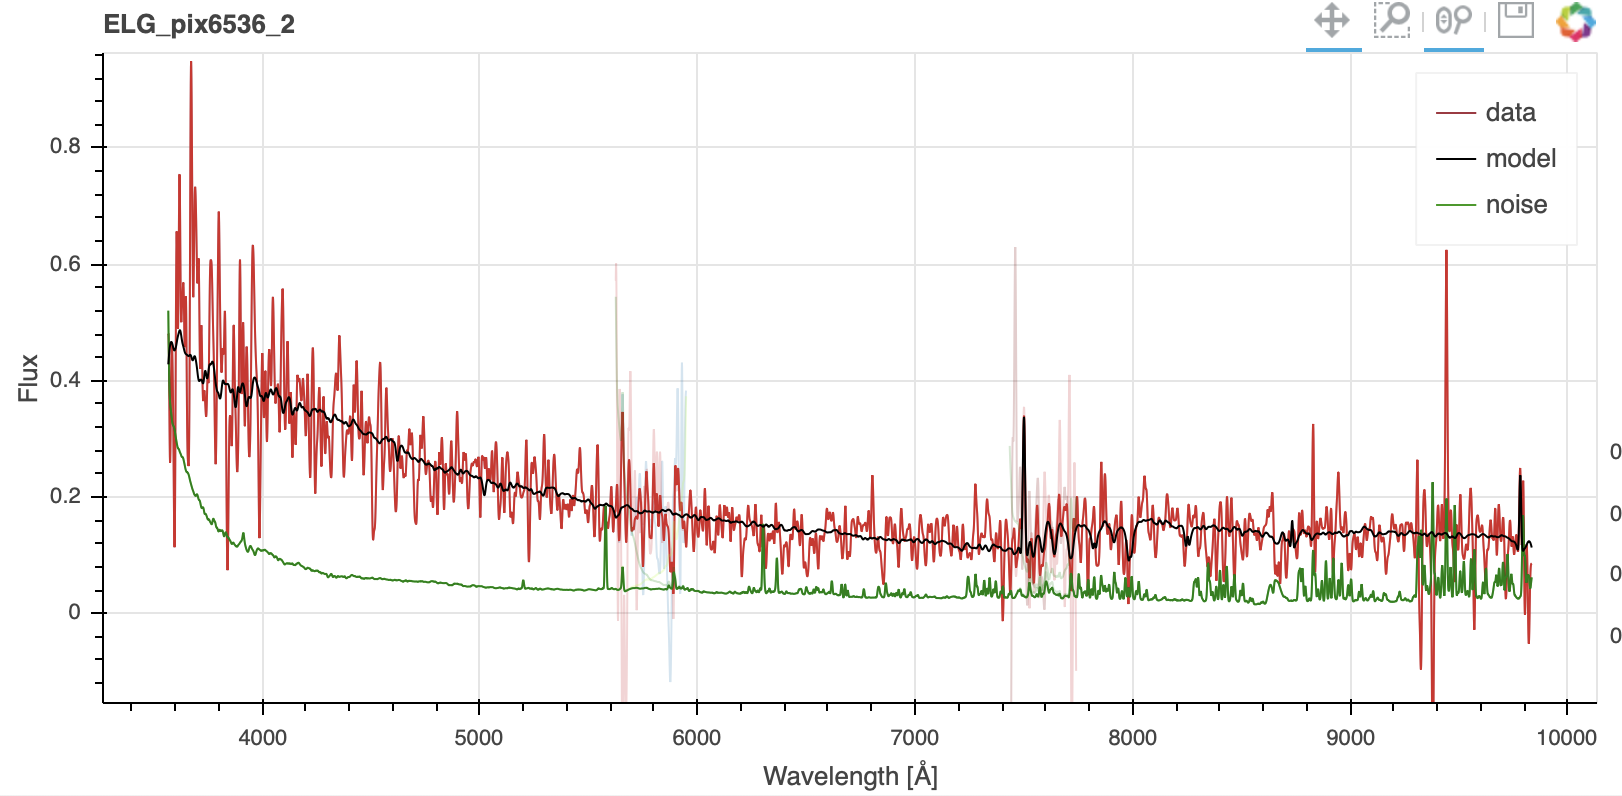


***

In [151]:
this_ID = (vi['TargetID'] == 288230403565685552) #ELG - flags vary from 0 to 4
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230403565685552,3,1.217,1.21763,GALAXY,ELG
288230403565685552,1,1.217,1.21763,GALAXY,ELG
288230403565685552,0,1.217,1.21763,GALAXY,ELG
288230403565685552,1,1.217,1.21763,GALAXY,ELG
288230403565685552,2,1.217,1.21763,GALAXY,ELG
288230403565685552,4,1.217,1.21763,GALAXY,ELG
288230403565685552,2,1.217,1.21763,GALAXY,ELG


https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/elg_bluesquare/pix6536/specviewer_ELG_pix6536_2.html -> spec 14

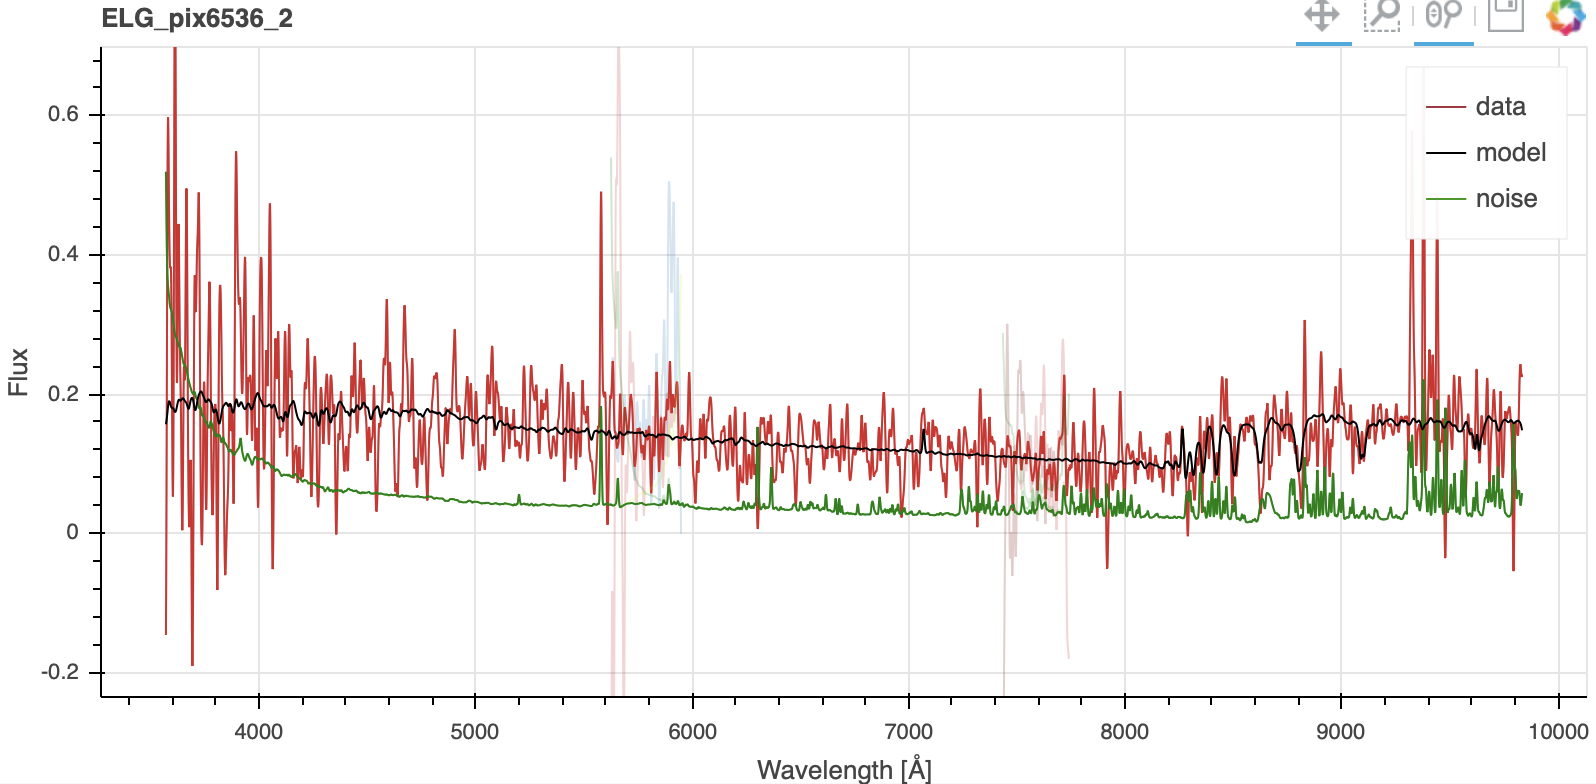




***

In [152]:
this_ID = (vi['TargetID'] == 288230485253947809)
vi[this_ID]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230485253947809,1,0.369,0.369336,GALAXY,BGS
288230485253947809,1,0.369,0.369336,GALAXY,BGS
288230485253947809,2,0.369,0.369336,GALAXY,BGS


https://portal.nersc.gov/project/desi/users/armengau/svdc2019c/v2/bgs/pix26012/specviewer_BGS_ANY_pix26012_4.html  -> spec 12

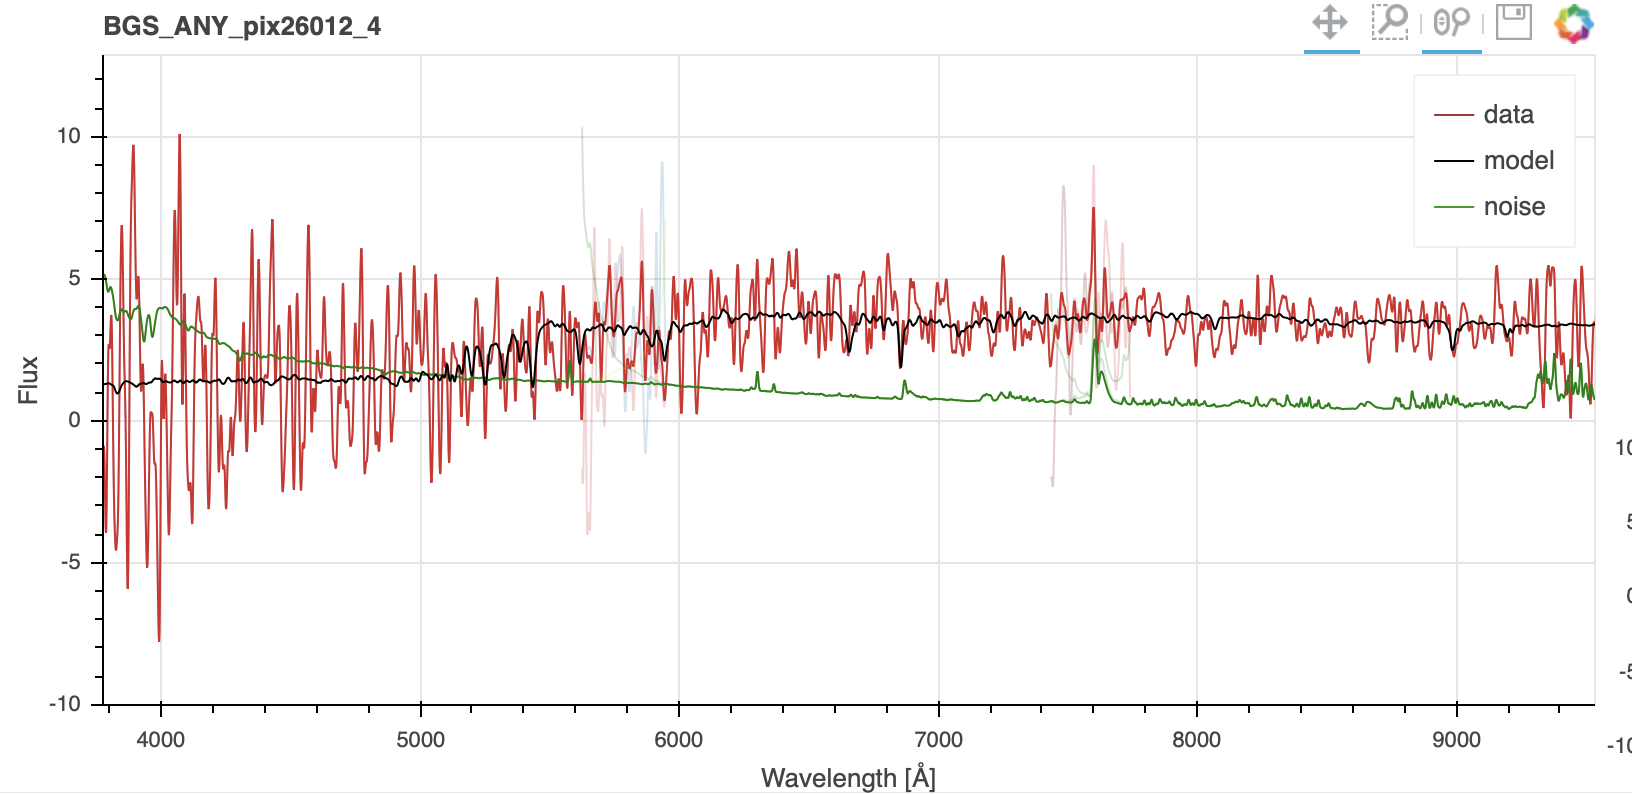

***